In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target.reshape(-1, 1)

# Split the data: 70% train, 15% val, 15% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)  # 0.1765 * 85% ≈ 15%

# Normalize features (zero mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [3]:
input_dim = X.shape[1]  # 8 features
hidden_units = 64
output_dim = 1
learning_rate = 0.001
epochs = 100
batch_size = 32


In [4]:
initializer = tf.keras.initializers.HeNormal()

W1 = tf.Variable(initializer([input_dim, hidden_units]))
b1 = tf.Variable(tf.zeros([hidden_units]))

W2 = tf.Variable(initializer([hidden_units, hidden_units]))
b2 = tf.Variable(tf.zeros([hidden_units]))

W3 = tf.Variable(initializer([hidden_units, output_dim]))
b3 = tf.Variable(tf.zeros([output_dim]))


In [6]:
def relu(x):
    return tf.maximum(x, 0)

def forward_pass(x):
    z1 = tf.matmul(x, W1) + b1
    a1 = relu(z1)
    z2 = tf.matmul(a1, W2) + b2
    a2 = relu(z2)
    output = tf.matmul(a2, W3) + b3
    return output


In [7]:
def mse_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))


In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate)


In [9]:
train_mse_list = []
val_mse_list = []

num_batches = int(np.ceil(len(X_train) / batch_size))

for epoch in range(epochs):
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        x_batch = tf.convert_to_tensor(X_train_shuffled[start:end], dtype=tf.float32)
        y_batch = tf.convert_to_tensor(y_train_shuffled[start:end], dtype=tf.float32)

        with tf.GradientTape() as tape:
            y_pred = forward_pass(x_batch)
            loss = mse_loss(y_pred, y_batch)

        grads = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
        optimizer.apply_gradients(zip(grads, [W1, b1, W2, b2, W3, b3]))

    # Compute MSE for train and validation sets
    train_pred = forward_pass(tf.convert_to_tensor(X_train, dtype=tf.float32))
    val_pred = forward_pass(tf.convert_to_tensor(X_val, dtype=tf.float32))
    train_mse = mse_loss(train_pred, tf.convert_to_tensor(y_train, dtype=tf.float32)).numpy()
    val_mse = mse_loss(val_pred, tf.convert_to_tensor(y_val, dtype=tf.float32)).numpy()

    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

    print(f"Epoch {epoch+1}/{epochs} - Train MSE: {train_mse:.4f}, Val MSE: {val_mse:.4f}")


Epoch 1/100 - Train MSE: 1.0489, Val MSE: 0.7793
Epoch 2/100 - Train MSE: 0.4857, Val MSE: 0.4721
Epoch 3/100 - Train MSE: 0.3843, Val MSE: 0.3892
Epoch 4/100 - Train MSE: 0.4532, Val MSE: 0.4121
Epoch 5/100 - Train MSE: 0.5012, Val MSE: 0.4667
Epoch 6/100 - Train MSE: 0.3443, Val MSE: 0.3518
Epoch 7/100 - Train MSE: 0.3380, Val MSE: 0.3497
Epoch 8/100 - Train MSE: 0.3672, Val MSE: 0.3784
Epoch 9/100 - Train MSE: 0.3764, Val MSE: 0.3560
Epoch 10/100 - Train MSE: 0.3382, Val MSE: 0.3460
Epoch 11/100 - Train MSE: 0.3487, Val MSE: 0.3516
Epoch 12/100 - Train MSE: 0.3499, Val MSE: 0.3559
Epoch 13/100 - Train MSE: 0.3698, Val MSE: 0.3585
Epoch 14/100 - Train MSE: 0.3298, Val MSE: 0.3487
Epoch 15/100 - Train MSE: 0.3196, Val MSE: 0.3325
Epoch 16/100 - Train MSE: 0.3327, Val MSE: 0.3440
Epoch 17/100 - Train MSE: 0.3304, Val MSE: 0.3394
Epoch 18/100 - Train MSE: 0.3282, Val MSE: 0.3371
Epoch 19/100 - Train MSE: 0.3358, Val MSE: 0.3501
Epoch 20/100 - Train MSE: 0.3157, Val MSE: 0.3342
Epoch 21/

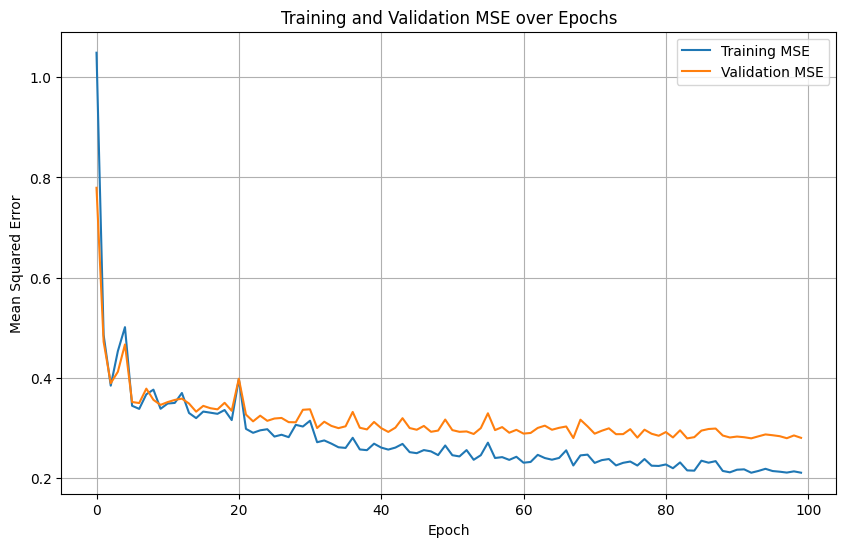

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(train_mse_list, label='Training MSE')
plt.plot(val_mse_list, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
test_pred = forward_pass(tf.convert_to_tensor(X_test, dtype=tf.float32))
test_mse = mse_loss(test_pred, tf.convert_to_tensor(y_test, dtype=tf.float32)).numpy()
print(f"\nFinal Test MSE: {test_mse:.4f}")



Final Test MSE: 0.2778
